<center><h2>ATTENTION! Avant de démarrer, merci de suivre la procédure en 4 étapes ci-dessous pour le bon fonctionnement de la page</h2></center>
<b style="color:red;">1°) Cliquez sur le bouton "Sans Confiance"</b> 
<center><img src="./trust.png"></center>
<p>
<br></p>
<b style="color:red;">2°) Cliquer sur le bouton rouge "Faire Confiance" pour autoriser l'exécution des scripts de la page</b>
<center><img src="./trust2.png"></center>
<p>
<br></p>
<b style="color:red;">3°) Cliquez sur l'icone "redémarrer le noyau et ré-exécuter tout le notebook"</b>
<center><img src="./trust3.png"></center>
<p>
<br></p>
<b style="color:red;">4°) Cliquez sur le bouton rouge "Relancer et exécuter toutes les cellules" pour exécuter tous les programmes pythons déjà présents sur la page</b>
<center><img src="./trust4.png"></center>

# TP6 - Mouvement de la membrane d'un HP

<h2>Travail demandé:</h2>

<ol><li> Inscrire vos réponses, programmes, images dans les blocs réponse prévus pour construire votre compte rendu</li>
<li> Vous pouvez tester et/ou modifier les différents morceaux de code proposés</li>
<li> Sauvegardez régulièrement votre travail. Attention, la sauvegarde se fait dans un espace temporaire et le fichier sera perdu au bout de quelques heures. </li>
<li> Téléchargez votre fichier au <b>format Notebook</b> si vous souhaitez pouvoir le <b>modifier plus tard</b>. Téléchargez le au <b> format html</b> si vous souhaitez simplement une <b>trace écrite</b> ou pour le rendre au professeur.</li></ol>

In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_toggle') {
        $(this).hide();
        $(this).parent().next().find('div.input').hide();
        $(this).parent().next().find('div.output').hide();
       
      }
    });

    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
    if (id == 0 ){
      $(this).show();
            $(this).parent().next().find('div.input').show();
        $(this).parent().next().find('div.output').show();
    }
    });
    $('div.output_prompt').css('opacity', 1);
  
  }
  code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>''')
#<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# fonction pour cacher une cellule
# à exécuter une fois au début pour la mettre en mémoire

from IPython.display import HTML
import random



def hide_toggle(for_next=True,texte="Montrer/cacher"):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
  

    toggle_text = texte  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        js_hide_current = this_cell + '.find("div.input").hide();'+this_cell+ '.find("div.output").hide();'

    js_f_name = f'code_toggle_{random.randint(1,2**64)}'

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {this_cell}.find('div.input').hide();

            }}
             $('div.prompt').hide();
        </script>

        <form action="javascript:{f_name}()"><input type="submit" id="toggleButton" value={toggle_text}></form>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text,
        this_cell=this_cell
    )
    

    return HTML(html)




In [3]:
hide_toggle(texte="Installation_automatique_des_bibliothèques")

In [4]:
# Installation des bibliothèques à exécuter une fois au début
!pip install matplotlib
!pip install scipy


<h3>Matériel :</h3>
<ul><li>Arduino nano</li>
    <li>Breadboard</li>
    <li>Fils</li>
    <li>HC-SR04</li>
    <li>Ecran rigide</li>
    <li>Metre ruban</li>
    <li>Ordinateur</li></ul>
    <br>
<h3>Logiciels :</h3>
<ul><li>Navigateur web type Mozilla firefox</li>
    <li>IDE Arduino</li></ul>
    <br>

In [5]:
# imports à exécuter une fois au début
from math import pi
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [6]:
%matplotlib notebook

# Sujet

<p>Nous vous proposons ici deux chaînes de mesure différentes pour obtenir des informations sur la vibration de la membrane d'un HP. Dans un premier temps avec l'utilisation d'une porte optique (montage utilisant un laser et une photoresistance), puis dans un deuxième temps, l'utilisation d'un accéléromètre.</p>

<h2>Partie 1 - Mesure par porte optique</h2>
<p>Pour étudier le mouvement de la membrane du HP, il faut réaliser le <b>montage de la figure 1.</b> comportant une photorésistance. L'autre résistance a une valeur de $1\ k \Omega$. Réalisez ce montage sans relier la carte Arduino à l’ordinateur.</p>
<p><center><b>Figure 1. Montage à réaliser</b>
<img src="./TP6_figure1.png"></center></p>
<p>Un laser est placé en face de cette phtorésistance <b>comme sur la figure 2.</b>. Un masque fixé sur le haut parleur viendra ensuite couper le faisceau lumineux périodiquement. Il faudra donc régler finement la hauteur des trois pièces pour que le faisceau soit coupé périodiquement lors du fonctionnement du HP. 
<p><center><b>Figure 2. Ajout du laser</b>
<img src="./TP6_figure2.jpg"></center></p>
<p>Le HP peut être alimenté directement par GBF. Nous utiliserons des fréquences entre 20 et 150 Hz pour réaliser les mesures ainsi que des fréquences plus basses pour les réglages.</p>


<b>1°)</b> Téléchargez le programme <a href="./photoresmembrane.ino" target="_blank">photoresmembrane.ino</a> fourni et <b>téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.<p>Ce programme renvoie une liste de données sous la forme d'un couple "temps","valeur" pour chaque point, avec un temps en µs.</p>
<p><br>Pour réaliser une série de mesures:
<ul><li>Positionner le laser bien en face de la photorésistance et le masque dans le faisceau</li>
    <li>Réglez le montage à la bonne hauteur pour que le masque coupe le faisceau puis le libère au cours du temps (utilisez une fréquence faible)</li>
    <li>Réglez le GBF à la fréquence voulue (entre 20 et 150 Hz) et à l'amplitude voulue</li>
    <li>Ouvrir le moniteur série du logiciel arduino et <b style="color:red;">réglez le au bon débit</b></li>
    <li>Appuyez sur le bouton RESET de la carte arduino</li>
    <li>Cliquez rapidement (avant que les mesures ne démarrent) sur le bouton "Effacer la sortie" du moniteur série</li>
    <li>Observez les valeurs s'afficher et attendre que la procédure s'arrête</li>
    <li>Vous pouvez copier l'ensemble des valeurs et les coller dans le programme python ci-dessous en choisissant un nom de variable -comme dans l'exemple de la premiere ligne- puis exécutez la cellule.</li></ul>

In [7]:
data = [[224.00,462],[992.00,424],[1768.00,384],[2604.00,356],[3448.00,360],[4296.00,399],[5144.00,452],[5984.00,489],[6824.00,503],[7672.00,506],[8520.00,501],[9368.00,489],[10216.00,463],[11104.00,419],[11992.00,375],[12920.00,354],[14200.00,394],[15472.00,470],[16744.00,502],[18024.00,505],[19296.00,490],[20568.00,448],[21848.00,381],[23120.00,354],[24400.00,405],[25672.00,478],[26944.00,504],[28224.00,503],[29504.00,486],[30768.00,437],[32048.00,373],[33320.00,357],[34592.00,416],[35872.00,485],[37144.00,505],[38424.00,502],[39696.00,481],[40968.00,428],[42248.00,367],[43520.00,361],[44792.00,428],[46072.00,491],[47344.00,505],[48624.00,500],[49896.00,475],[51168.00,418],[52448.00,360],[53720.00,367],[54992.00,440],[56272.00,495],[57544.00,506],[58824.00,498],[60100.00,469],[61368.00,407],[62648.00,356],[63920.00,376],[65192.00,452],[66472.00,499],[67744.00,506],[69024.00,496],[70296.00,462],[71568.00,398],[72848.00,354],[74120.00,386],[75392.00,463],[76672.00,501],[77944.00,505],[79224.00,493],[80496.00,454],[81768.00,388],[83048.00,353],[84320.00,396],[85600.00,472],[86872.00,503],[88144.00,504],[89424.00,489],[90696.00,445],[91968.00,380],[93248.00,355],[94520.00,408],[95792.00,480],[97080.00,504],[98344.00,503],[99624.00,485],[100896.00,435],[102256.00,368],[103616.00,363],[104976.00,436],[106336.00,495],[107696.00,506],[109056.00,496],[110416.00,459],[111776.00,389],[113136.00,354],[114496.00,405],[115856.00,481],[117216.00,505],[118584.00,501],[119936.00,477],[121296.00,415],[122656.00,358],[124016.00,378],[125376.00,460],[126736.00,501],[128096.00,505],[129456.00,490],[130816.00,440],[132176.00,372],[133536.00,359],[134896.00,429],[136256.00,493],[137616.00,506],[138976.00,497],[140336.00,463],[141696.00,394],[143056.00,353],[144416.00,399],[145776.00,477],[147140.00,504],[148496.00,502],[149856.00,480],[151216.00,421],[152576.00,360],[153936.00,373],[155296.00,453],[156656.00,500],[158016.00,505],[159376.00,492],[160736.00,447],[162096.00,377],[163456.00,357],[164816.00,422],[166176.00,490],[167536.00,506],[168896.00,499],[170256.00,467],[171616.00,400],[172976.00,354],[174336.00,392],[175696.00,472],[177056.00,504],[178416.00,503],[179776.00,483],[181136.00,426],[182496.00,363],[183856.00,368],[185216.00,447],[186576.00,498],[187936.00,505],[189296.00,494],[190656.00,452],[192016.00,382],[193376.00,355],[194736.00,416],[196096.00,487],[197456.00,505],[198816.00,500],[200176.00,471],[201536.00,406],[202896.00,355],[204256.00,386],[205624.00,468],[206976.00,503],[208336.00,504],[209696.00,486],[211056.00,432],[212416.00,366],[213776.00,364],[215136.00,440],[216496.00,496],[217856.00,506],[219216.00,495],[220576.00,457],[221936.00,387],[223296.00,354],[224656.00,409],[226016.00,484],[227376.00,505],[228736.00,501],[230096.00,475],[231456.00,412],[232816.00,357],[234180.00,381],[235536.00,462],[236896.00,502],[238256.00,504],[239616.00,488],[240976.00,437],[242336.00,370],[243696.00,361],[245056.00,433],[246416.00,494],[247776.00,506],[249136.00,497],[250496.00,461],[251856.00,392],[253216.00,353],[254576.00,402],[255936.00,479],[257296.00,505],[258656.00,502],[260016.00,478],[261376.00,418],[262736.00,359],[264096.00,375],[265456.00,457],[266816.00,500],[268176.00,505],[269536.00,491],[270896.00,443],[272256.00,375],[273616.00,358],[274976.00,426],[276336.00,492],[277696.00,506],[279056.00,498],[280416.00,466],[281776.00,398],[283136.00,354],[284496.00,395],[285856.00,475],[287216.00,504],[288576.00,503],[289936.00,482],[291296.00,424],[292664.00,362],[294016.00,371],[295376.00,450],[296736.00,499],[298096.00,505],[299456.00,493],[300816.00,449],[302176.00,379],[303536.00,356],[304896.00,419],[306256.00,489],[307616.00,506],[308976.00,499],[310336.00,469],[311696.00,403],[313056.00,354],[314416.00,389],[315776.00,470],[317136.00,503],[318496.00,503],[319856.00,484],[321220.00,429],[322576.00,365],[323936.00,366],[325296.00,443],[326656.00,497],[328016.00,505],[329376.00,494],[330736.00,454],[332096.00,384],[333456.00,355],[334816.00,412],[336176.00,485],[337536.00,505],[338896.00,500],[340256.00,473],[341616.00,409],[342976.00,356],[344336.00,383],[345696.00,465],[347056.00,502],[348416.00,504],[349776.00,487],[351136.00,435],[352496.00,368],[353856.00,362],[355216.00,436],[356576.00,495],[357936.00,506],[359296.00,496],[360656.00,459],[362016.00,389],[363376.00,354],[364736.00,405],[366096.00,481],[367456.00,505],[368816.00,501],[370176.00,477],[371536.00,415],[372896.00,358],[374256.00,378],[375616.00,459],[376976.00,501],[378336.00,505],[379704.00,489],[381056.00,440],[382416.00,372],[383776.00,359],[385136.00,429],[386496.00,493],[387856.00,506],[389216.00,497],[390576.00,464],[391936.00,395],[393296.00,354],[394656.00,399],[396016.00,477],[397376.00,504],[398736.00,502],[400096.00,480],[401456.00,421],[402816.00,360],[404176.00,373],[405536.00,453],[406896.00,500],[408260.00,505],[409616.00,492],[410976.00,446],[412336.00,377],[413696.00,357],[415056.00,422],[416416.00,490],[417776.00,506],[419136.00,499],[420496.00,467],[421856.00,400],[423216.00,354],[424576.00,392],[425936.00,472],[427296.00,504],[428656.00,503],[430016.00,483],[431376.00,426],[432736.00,363],[434096.00,369],[435456.00,447],[436816.00,498],[438176.00,505],[439536.00,494],[440896.00,452],[442256.00,382],[443616.00,355],[444976.00,415],[446336.00,487],[447696.00,505],[449056.00,500],[450416.00,471],[451776.00,406],[453136.00,355],[454496.00,386],[455856.00,468],[457216.00,503],[458576.00,504],[459936.00,486],[461296.00,432],[462656.00,367],[464016.00,365],[465376.00,440],[466744.00,496],[468096.00,506],[469456.00,495],[470816.00,457],[472176.00,387],[473536.00,354],[474896.00,409],[476256.00,483],[477616.00,505],[478976.00,501],[480336.00,475],[481696.00,412],[483056.00,357],[484416.00,381],[485776.00,462],[487136.00,502],[488496.00,504],[489856.00,488],[491216.00,437],[492576.00,370],[493936.00,361],[495300.00,433],[496656.00,494],[498016.00,506],[499376.00,497],[500736.00,462],[502096.00,392],[503456.00,354],[504816.00,403],[506176.00,479],[507536.00,505],[508896.00,502],[510256.00,479],[511616.00,418],[512976.00,359],[514336.00,375],[515696.00,456],[517056.00,500],[518416.00,505],[519776.00,491],[521136.00,443],[522496.00,375],[523856.00,358],[525216.00,426],[526576.00,492],[527936.00,506],[529296.00,498],[530656.00,466],[532016.00,398],[533376.00,355],[534736.00,396],[536096.00,475],[537456.00,504],[538816.00,503],[540176.00,482],[541536.00,423],[542896.00,361],[544256.00,370],[545616.00,450],[546976.00,499],[548336.00,505],[549696.00,493],[551056.00,449],[552416.00,379],[553784.00,356],[555136.00,419],[556496.00,489],[557856.00,505],[559216.00,499],[560576.00,470],[561936.00,404],[563296.00,355],[564656.00,389],[566016.00,470],[567376.00,503],[568736.00,503],[570096.00,485],[571456.00,429],[572816.00,365],[574176.00,366],[575536.00,443],[576896.00,497],[578256.00,505],[579616.00,494],[580976.00,454],[582340.00,384],[583696.00,355],[585056.00,412],[586416.00,485],[587776.00,505],[589136.00,500],[590496.00,473],[591856.00,409],[593216.00,356],[594576.00,384],[595936.00,465],[597296.00,502],[598656.00,504],[600016.00,487],[601376.00,435],[602736.00,369],[604096.00,363],[605456.00,436],[606816.00,495],[608176.00,506],[609536.00,496],[610896.00,459],[612256.00,390],[613616.00,354],[614976.00,405],[616336.00,481],[617696.00,505],[619056.00,501],[620416.00,477],[621776.00,415],[623136.00,358],[624496.00,378],[625856.00,459],[627216.00,501],[628576.00,505],[629936.00,490],[631296.00,441],[632656.00,373],[634016.00,360],[635376.00,429],[636736.00,493],[638096.00,506],[639456.00,497],[640824.00,463],[642176.00,395],[643536.00,354],[644896.00,399],[646256.00,477],[647616.00,504],[648976.00,502],[650336.00,480],[651696.00,421],[653056.00,360],[654416.00,373],[655776.00,453],[657136.00,500],[658496.00,505],[659856.00,492],[661216.00,446],[662576.00,377],[663936.00,357],[665296.00,423],[666656.00,490],[668016.00,506],[669380.00,499],[670736.00,468],[672096.00,401],[673456.00,354],[674816.00,393],[676176.00,473],[677536.00,504],[678896.00,503],[680256.00,483],[681616.00,426],[682976.00,363],[684336.00,368],[685696.00,447],[687056.00,498],[688416.00,505],[689776.00,494],[691136.00,452],[692496.00,382],[693856.00,356],[695216.00,416],[696576.00,487],[697936.00,505],[699296.00,500],[700656.00,471],[702016.00,407],[703376.00,355],[704736.00,387],[706096.00,468],[707456.00,503],[708816.00,504],[710176.00,486],[711536.00,432],[712896.00,367],[714256.00,364],[715616.00,440],[716976.00,496],[718336.00,506],[719696.00,495],[721056.00,457],[722416.00,387],[723776.00,355],[725136.00,409],[726496.00,483],[727864.00,505],[729216.00,501],[730576.00,475],[731936.00,412],[733296.00,357],[734656.00,381],[736016.00,463],[737376.00,502],[738736.00,504],[740096.00,488],[741456.00,438],[742816.00,371],[744176.00,361],[745536.00,433],[746896.00,494],[748256.00,506],[749616.00,497],[750976.00,461],[752336.00,392],[753696.00,354],[755056.00,402],[756420.00,479],[757776.00,505],[759136.00,502],[760496.00,478],[761856.00,418],[763216.00,359],[764576.00,376],[765936.00,457],[767296.00,500],[768656.00,505],[770016.00,491],[771376.00,443],[772736.00,375],[774096.00,359],[775456.00,426],[776816.00,492],[778176.00,506],[779536.00,498],[780896.00,466],[782256.00,398],[783616.00,354],[784976.00,396],[786336.00,475],[787696.00,504],[789056.00,503],[790416.00,481],[791776.00,423],[793136.00,362],[794496.00,371],[795856.00,450],[797216.00,499],[798576.00,505],[799936.00,493],[801296.00,449],[802656.00,380],[804016.00,357],[805376.00,420],[806736.00,489],[808096.00,506],[809456.00,499],[810816.00,469],[812176.00,403],[813536.00,355],[814904.00,390],[816256.00,470],[817616.00,503],[818976.00,503],[820336.00,484],[821696.00,429],[823056.00,365],[824416.00,367],[825776.00,444],[827136.00,497],[828496.00,505],[829856.00,494],[831216.00,454],[832576.00,384],[833936.00,355],[835296.00,413],[836656.00,485],[838016.00,505],[839376.00,500],[840736.00,473],[842096.00,409],[843460.00,356],[844816.00,384],[846176.00,465],[847536.00,502],[848896.00,504],[850256.00,487],[851616.00,434],[852976.00,368],[854336.00,363],[855696.00,436],[857056.00,495],[858416.00,506],[859776.00,496],[861136.00,459],[862496.00,389],[863856.00,354],[865216.00,406],[866576.00,481],[867936.00,505],[869296.00,502],[870656.00,477],[872016.00,416],[873376.00,359],[874736.00,379],[876096.00,460],[877456.00,501],[878816.00,505],[880176.00,489],[881536.00,440],[882896.00,373],[884256.00,360],[885616.00,429],[886976.00,493],[888336.00,506],[889696.00,497],[891056.00,463],[892416.00,395],[893776.00,354],[895136.00,399],[896496.00,477],[897856.00,504],[899216.00,502],[900576.00,480],[901944.00,420],[903296.00,361],[904656.00,374],[906016.00,454],[907376.00,500],[908736.00,505],[910096.00,492],[911456.00,446],[912816.00,377],[914176.00,357],[915536.00,423],[916896.00,490],[918256.00,506],[919616.00,499],[920976.00,467],[922336.00,400],[923696.00,354],[925056.00,393],[926416.00,472],[927776.00,504],[929136.00,503],[930500.00,483],[931856.00,427],[933216.00,364],[934576.00,369],[935936.00,447],[937296.00,498],[938656.00,505],[940016.00,494],[941376.00,452],[942736.00,382],[944096.00,355],[945456.00,416],[946816.00,487],[948176.00,505],[949536.00,500],[950896.00,471],[952256.00,407],[953616.00,356],[954976.00,387],[956336.00,468],[957696.00,503],[959056.00,504],[960416.00,486],[961776.00,432],[963136.00,367],[964496.00,365],[965856.00,440],[967216.00,496],[968576.00,506],[969936.00,495],[971296.00,457],[972656.00,387],[974016.00,354],[975376.00,409],[976736.00,483],[978096.00,505],[979456.00,501],[980816.00,475],[982176.00,412],[983536.00,357],[984896.00,381],[986256.00,462],[987616.00,502],[988984.00,504],[990336.00,488],[991696.00,438],[993056.00,370],[994416.00,361],[995776.00,433],[997136.00,494],[998496.00,506],[999856.00,497],[1001216.00,462],[1002664.00,388],[1004104.00,355],[1005552.00,418],[1006992.00,490],[1008448.00,506],[1009888.00,496],[1011328.00,457],[1012776.00,383],[1014224.00,357],[1015664.00,425],[1017112.00,493],[1018556.00,506],[1020000.00,495],[1021448.00,452],[1022888.00,379],[1024336.00,359],[1025784.00,432],[1027224.00,495],[1028672.00,505],[1030120.00,493],[1031560.00,447],[1033008.00,374],[1034448.00,361],[1035896.00,438],[1037344.00,497],[1038784.00,505],[1040232.00,491],[1041680.00,441],[1043120.00,370],[1044568.00,365],[1046008.00,445],[1047456.00,499],[1048904.00,505],[1050344.00,489],[1051792.00,436],[1053240.00,366],[1054680.00,368],[1056128.00,452],[1057568.00,500],[1059016.00,504],[1060464.00,487],[1061904.00,430],[1063352.00,363],[1064800.00,373],[1066240.00,458],[1067688.00,502],[1069128.00,504],[1070576.00,484],[1072024.00,425],[1073464.00,361],[1074912.00,378],[1076352.00,463],[1077800.00,503],[1079248.00,503],[1080688.00,482],[1082136.00,419],[1083584.00,358],[1085024.00,382],[1086472.00,468],[1087912.00,503],[1089360.00,502],[1090808.00,478],[1092248.00,414],[1093696.00,356],[1095144.00,388],[1096584.00,473],[1098032.00,504],[1099472.00,502],[1100920.00,475],[1102368.00,408],[1103808.00,355],[1105256.00,395],[1106704.00,478],[1108144.00,505],[1109592.00,501],[1111032.00,472],[1112480.00,403],[1113928.00,354],[1115368.00,400],[1116816.00,481],[1118264.00,505],[1119704.00,500],[1121152.00,468],[1122592.00,397],[1124040.00,354],[1125488.00,407],[1126928.00,485],[1128376.00,506],[1129824.00,498],[1131264.00,464],[1132712.00,392],[1134152.00,355],[1135600.00,414],[1137048.00,488],[1138496.00,506],[1139936.00,497],[1141384.00,460],[1142824.00,387],[1144272.00,355],[1145720.00,420],[1147160.00,491],[1148612.00,506],[1150048.00,496],[1151496.00,456],[1152944.00,382],[1154384.00,357],[1155832.00,427],[1157272.00,494],[1158720.00,505],[1160168.00,494],[1161608.00,451],[1163064.00,377],[1164504.00,359],[1165944.00,433],[1167392.00,496],[1168832.00,505],[1170280.00,493],[1171728.00,445],[1173168.00,373],[1174616.00,362],[1176064.00,441],[1177504.00,498],[1178952.00,505],[1180392.00,491],[1181840.00,440],[1183288.00,369],[1184728.00,365],[1186176.00,447],[1187624.00,499],[1189064.00,505],[1190512.00,488],[1191952.00,434],[1193400.00,365],[1194848.00,370],[1196288.00,453],[1197736.00,501],[1199184.00,504],[1200624.00,486],[1202072.00,429],[1203512.00,363],[1204960.00,375],[1206408.00,460],[1207848.00,502],[1209296.00,504],[1210744.00,483],[1212184.00,423],[1213632.00,359],[1215080.00,379],[1216520.00,464],[1217968.00,503],[1219408.00,503],[1220856.00,481],[1222304.00,417],[1223744.00,357],[1225192.00,384],[1226632.00,469],[1228080.00,504],[1229528.00,502],[1230968.00,478],[1232416.00,412],[1233864.00,356],[1235304.00,390],[1236752.00,474],[1238192.00,504],[1239640.00,502],[1241088.00,474],[1242528.00,407],[1243976.00,355],[1245424.00,397],[1246864.00,479],[1248312.00,505],[1249752.00,501],[1251200.00,471],[1252648.00,401],[1254088.00,354],[1255536.00,403],[1256984.00,483],[1258424.00,505],[1259872.00,499],[1261320.00,467],[1262760.00,395],[1264208.00,354],[1265648.00,409],[1267096.00,486],[1268544.00,506],[1269984.00,498],[1271432.00,463],[1272872.00,391],[1274320.00,355],[1275768.00,416],[1277208.00,489],[1278660.00,506],[1280104.00,497],[1281544.00,459],[1282992.00,385],[1284432.00,356],[1285880.00,422],[1287328.00,492],[1288768.00,506],[1290216.00,495],[1291664.00,454],[1293112.00,380],[1294552.00,357],[1295992.00,428],[1297440.00,494],[1298888.00,505],[1300328.00,494],[1301776.00,448],[1303228.00,375],[1304664.00,360],[1306112.00,436],[1307552.00,496],[1309000.00,505],[1310448.00,492],[1311888.00,444],[1313336.00,372],[1314784.00,364],[1316224.00,442],[1317672.00,498],[1319120.00,505],[1320560.00,490],[1322008.00,438],[1323448.00,368],[1324896.00,367],[1326344.00,449],[1327784.00,500],[1329232.00,504],[1330680.00,488],[1332120.00,432],[1333568.00,364],[1335008.00,371],[1336456.00,455],[1337904.00,501],[1339344.00,504],[1340792.00,485],[1342232.00,427],[1343680.00,362],[1345128.00,376],[1346568.00,461],[1348016.00,502],[1349464.00,504],[1350904.00,483],[1352352.00,422],[1353792.00,359],[1355240.00,381],[1356688.00,466],[1358128.00,503],[1359576.00,503],[1361024.00,480],[1362464.00,416],[1363912.00,357],[1365352.00,386],[1366800.00,471]]




<b>2°)</b> Construisez <b style="color:red;">en python</b> les listes <b>temps</b> (en s) et <b>valeur</b> à partir de la liste data précédente.

In [ ]:
temps = []
valeur = []


In [8]:
hide_toggle(texte="Correction")

<b>3°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de tracer le graphique représentant la valeur mesurée en fonction du temps. 

In [9]:
hide_toggle(texte="Correction")

In [10]:
data=[[224.00,462],[992.00,424],[1768.00,384],[2604.00,356],[3448.00,360],[4296.00,399],[5144.00,452],[5984.00,489],[6824.00,503],[7672.00,506],[8520.00,501],[9368.00,489],[10216.00,463],[11104.00,419],[11992.00,375],[12920.00,354],[14200.00,394],[15472.00,470],[16744.00,502],[18024.00,505],[19296.00,490],[20568.00,448],[21848.00,381],[23120.00,354],[24400.00,405],[25672.00,478],[26944.00,504],[28224.00,503],[29504.00,486],[30768.00,437],[32048.00,373],[33320.00,357],[34592.00,416],[35872.00,485],[37144.00,505],[38424.00,502],[39696.00,481],[40968.00,428],[42248.00,367],[43520.00,361],[44792.00,428],[46072.00,491],[47344.00,505],[48624.00,500],[49896.00,475],[51168.00,418],[52448.00,360],[53720.00,367],[54992.00,440],[56272.00,495],[57544.00,506],[58824.00,498],[60100.00,469],[61368.00,407],[62648.00,356],[63920.00,376],[65192.00,452],[66472.00,499],[67744.00,506],[69024.00,496],[70296.00,462],[71568.00,398],[72848.00,354],[74120.00,386],[75392.00,463],[76672.00,501],[77944.00,505],[79224.00,493],[80496.00,454],[81768.00,388],[83048.00,353],[84320.00,396],[85600.00,472],[86872.00,503],[88144.00,504],[89424.00,489],[90696.00,445],[91968.00,380],[93248.00,355],[94520.00,408],[95792.00,480],[97080.00,504],[98344.00,503],[99624.00,485],[100896.00,435],[102256.00,368],[103616.00,363],[104976.00,436],[106336.00,495],[107696.00,506],[109056.00,496],[110416.00,459],[111776.00,389],[113136.00,354],[114496.00,405],[115856.00,481],[117216.00,505],[118584.00,501],[119936.00,477],[121296.00,415],[122656.00,358],[124016.00,378],[125376.00,460],[126736.00,501],[128096.00,505],[129456.00,490],[130816.00,440],[132176.00,372],[133536.00,359],[134896.00,429],[136256.00,493],[137616.00,506],[138976.00,497],[140336.00,463],[141696.00,394],[143056.00,353],[144416.00,399],[145776.00,477],[147140.00,504],[148496.00,502],[149856.00,480],[151216.00,421],[152576.00,360],[153936.00,373],[155296.00,453],[156656.00,500],[158016.00,505],[159376.00,492],[160736.00,447],[162096.00,377],[163456.00,357],[164816.00,422],[166176.00,490],[167536.00,506],[168896.00,499],[170256.00,467],[171616.00,400],[172976.00,354],[174336.00,392],[175696.00,472],[177056.00,504],[178416.00,503],[179776.00,483],[181136.00,426],[182496.00,363],[183856.00,368],[185216.00,447],[186576.00,498],[187936.00,505],[189296.00,494],[190656.00,452],[192016.00,382],[193376.00,355],[194736.00,416],[196096.00,487],[197456.00,505],[198816.00,500],[200176.00,471],[201536.00,406],[202896.00,355],[204256.00,386],[205624.00,468],[206976.00,503],[208336.00,504],[209696.00,486],[211056.00,432],[212416.00,366],[213776.00,364],[215136.00,440],[216496.00,496],[217856.00,506],[219216.00,495],[220576.00,457],[221936.00,387],[223296.00,354],[224656.00,409],[226016.00,484],[227376.00,505],[228736.00,501],[230096.00,475],[231456.00,412],[232816.00,357],[234180.00,381],[235536.00,462],[236896.00,502],[238256.00,504],[239616.00,488],[240976.00,437],[242336.00,370],[243696.00,361],[245056.00,433],[246416.00,494],[247776.00,506],[249136.00,497],[250496.00,461],[251856.00,392],[253216.00,353],[254576.00,402],[255936.00,479],[257296.00,505],[258656.00,502],[260016.00,478],[261376.00,418],[262736.00,359],[264096.00,375],[265456.00,457],[266816.00,500],[268176.00,505],[269536.00,491],[270896.00,443],[272256.00,375],[273616.00,358],[274976.00,426],[276336.00,492],[277696.00,506],[279056.00,498],[280416.00,466],[281776.00,398],[283136.00,354],[284496.00,395],[285856.00,475],[287216.00,504],[288576.00,503],[289936.00,482],[291296.00,424],[292664.00,362],[294016.00,371],[295376.00,450],[296736.00,499],[298096.00,505],[299456.00,493],[300816.00,449],[302176.00,379],[303536.00,356],[304896.00,419],[306256.00,489],[307616.00,506],[308976.00,499],[310336.00,469],[311696.00,403],[313056.00,354],[314416.00,389],[315776.00,470],[317136.00,503],[318496.00,503],[319856.00,484],[321220.00,429],[322576.00,365],[323936.00,366],[325296.00,443],[326656.00,497],[328016.00,505],[329376.00,494],[330736.00,454],[332096.00,384],[333456.00,355],[334816.00,412],[336176.00,485],[337536.00,505],[338896.00,500],[340256.00,473],[341616.00,409],[342976.00,356],[344336.00,383],[345696.00,465],[347056.00,502],[348416.00,504],[349776.00,487],[351136.00,435],[352496.00,368],[353856.00,362],[355216.00,436],[356576.00,495],[357936.00,506],[359296.00,496],[360656.00,459],[362016.00,389],[363376.00,354],[364736.00,405],[366096.00,481],[367456.00,505],[368816.00,501],[370176.00,477],[371536.00,415],[372896.00,358],[374256.00,378],[375616.00,459],[376976.00,501],[378336.00,505],[379704.00,489],[381056.00,440],[382416.00,372],[383776.00,359],[385136.00,429],[386496.00,493],[387856.00,506],[389216.00,497],[390576.00,464],[391936.00,395],[393296.00,354],[394656.00,399],[396016.00,477],[397376.00,504],[398736.00,502],[400096.00,480],[401456.00,421],[402816.00,360],[404176.00,373],[405536.00,453],[406896.00,500],[408260.00,505],[409616.00,492],[410976.00,446],[412336.00,377],[413696.00,357],[415056.00,422],[416416.00,490],[417776.00,506],[419136.00,499],[420496.00,467],[421856.00,400],[423216.00,354],[424576.00,392],[425936.00,472],[427296.00,504],[428656.00,503],[430016.00,483],[431376.00,426],[432736.00,363],[434096.00,369],[435456.00,447],[436816.00,498],[438176.00,505],[439536.00,494],[440896.00,452],[442256.00,382],[443616.00,355],[444976.00,415],[446336.00,487],[447696.00,505],[449056.00,500],[450416.00,471],[451776.00,406],[453136.00,355],[454496.00,386],[455856.00,468],[457216.00,503],[458576.00,504],[459936.00,486],[461296.00,432],[462656.00,367],[464016.00,365],[465376.00,440],[466744.00,496],[468096.00,506],[469456.00,495],[470816.00,457],[472176.00,387],[473536.00,354],[474896.00,409],[476256.00,483],[477616.00,505],[478976.00,501],[480336.00,475],[481696.00,412],[483056.00,357],[484416.00,381],[485776.00,462],[487136.00,502],[488496.00,504],[489856.00,488],[491216.00,437],[492576.00,370],[493936.00,361],[495300.00,433],[496656.00,494],[498016.00,506],[499376.00,497],[500736.00,462],[502096.00,392],[503456.00,354],[504816.00,403],[506176.00,479],[507536.00,505],[508896.00,502],[510256.00,479],[511616.00,418],[512976.00,359],[514336.00,375],[515696.00,456],[517056.00,500],[518416.00,505],[519776.00,491],[521136.00,443],[522496.00,375],[523856.00,358],[525216.00,426],[526576.00,492],[527936.00,506],[529296.00,498],[530656.00,466],[532016.00,398],[533376.00,355],[534736.00,396],[536096.00,475],[537456.00,504],[538816.00,503],[540176.00,482],[541536.00,423],[542896.00,361],[544256.00,370],[545616.00,450],[546976.00,499],[548336.00,505],[549696.00,493],[551056.00,449],[552416.00,379],[553784.00,356],[555136.00,419],[556496.00,489],[557856.00,505],[559216.00,499],[560576.00,470],[561936.00,404],[563296.00,355],[564656.00,389],[566016.00,470],[567376.00,503],[568736.00,503],[570096.00,485],[571456.00,429],[572816.00,365],[574176.00,366],[575536.00,443],[576896.00,497],[578256.00,505],[579616.00,494],[580976.00,454],[582340.00,384],[583696.00,355],[585056.00,412],[586416.00,485],[587776.00,505],[589136.00,500],[590496.00,473],[591856.00,409],[593216.00,356],[594576.00,384],[595936.00,465],[597296.00,502],[598656.00,504],[600016.00,487],[601376.00,435],[602736.00,369],[604096.00,363],[605456.00,436],[606816.00,495],[608176.00,506],[609536.00,496],[610896.00,459],[612256.00,390],[613616.00,354],[614976.00,405],[616336.00,481],[617696.00,505],[619056.00,501],[620416.00,477],[621776.00,415],[623136.00,358],[624496.00,378],[625856.00,459],[627216.00,501],[628576.00,505],[629936.00,490],[631296.00,441],[632656.00,373],[634016.00,360],[635376.00,429],[636736.00,493],[638096.00,506],[639456.00,497],[640824.00,463],[642176.00,395],[643536.00,354],[644896.00,399],[646256.00,477],[647616.00,504],[648976.00,502],[650336.00,480],[651696.00,421],[653056.00,360],[654416.00,373],[655776.00,453],[657136.00,500],[658496.00,505],[659856.00,492],[661216.00,446],[662576.00,377],[663936.00,357],[665296.00,423],[666656.00,490],[668016.00,506],[669380.00,499],[670736.00,468],[672096.00,401],[673456.00,354],[674816.00,393],[676176.00,473],[677536.00,504],[678896.00,503],[680256.00,483],[681616.00,426],[682976.00,363],[684336.00,368],[685696.00,447],[687056.00,498],[688416.00,505],[689776.00,494],[691136.00,452],[692496.00,382],[693856.00,356],[695216.00,416],[696576.00,487],[697936.00,505],[699296.00,500],[700656.00,471],[702016.00,407],[703376.00,355],[704736.00,387],[706096.00,468],[707456.00,503],[708816.00,504],[710176.00,486],[711536.00,432],[712896.00,367],[714256.00,364],[715616.00,440],[716976.00,496],[718336.00,506],[719696.00,495],[721056.00,457],[722416.00,387],[723776.00,355],[725136.00,409],[726496.00,483],[727864.00,505],[729216.00,501],[730576.00,475],[731936.00,412],[733296.00,357],[734656.00,381],[736016.00,463],[737376.00,502],[738736.00,504],[740096.00,488],[741456.00,438],[742816.00,371],[744176.00,361],[745536.00,433],[746896.00,494],[748256.00,506],[749616.00,497],[750976.00,461],[752336.00,392],[753696.00,354],[755056.00,402],[756420.00,479],[757776.00,505],[759136.00,502],[760496.00,478],[761856.00,418],[763216.00,359],[764576.00,376],[765936.00,457],[767296.00,500],[768656.00,505],[770016.00,491],[771376.00,443],[772736.00,375],[774096.00,359],[775456.00,426],[776816.00,492],[778176.00,506],[779536.00,498],[780896.00,466],[782256.00,398],[783616.00,354],[784976.00,396],[786336.00,475],[787696.00,504],[789056.00,503],[790416.00,481],[791776.00,423],[793136.00,362],[794496.00,371],[795856.00,450],[797216.00,499],[798576.00,505],[799936.00,493],[801296.00,449],[802656.00,380],[804016.00,357],[805376.00,420],[806736.00,489],[808096.00,506],[809456.00,499],[810816.00,469],[812176.00,403],[813536.00,355],[814904.00,390],[816256.00,470],[817616.00,503],[818976.00,503],[820336.00,484],[821696.00,429],[823056.00,365],[824416.00,367],[825776.00,444],[827136.00,497],[828496.00,505],[829856.00,494],[831216.00,454],[832576.00,384],[833936.00,355],[835296.00,413],[836656.00,485],[838016.00,505],[839376.00,500],[840736.00,473],[842096.00,409],[843460.00,356],[844816.00,384],[846176.00,465],[847536.00,502],[848896.00,504],[850256.00,487],[851616.00,434],[852976.00,368],[854336.00,363],[855696.00,436],[857056.00,495],[858416.00,506],[859776.00,496],[861136.00,459],[862496.00,389],[863856.00,354],[865216.00,406],[866576.00,481],[867936.00,505],[869296.00,502],[870656.00,477],[872016.00,416],[873376.00,359],[874736.00,379],[876096.00,460],[877456.00,501],[878816.00,505],[880176.00,489],[881536.00,440],[882896.00,373],[884256.00,360],[885616.00,429],[886976.00,493],[888336.00,506],[889696.00,497],[891056.00,463],[892416.00,395],[893776.00,354],[895136.00,399],[896496.00,477],[897856.00,504],[899216.00,502],[900576.00,480],[901944.00,420],[903296.00,361],[904656.00,374],[906016.00,454],[907376.00,500],[908736.00,505],[910096.00,492],[911456.00,446],[912816.00,377],[914176.00,357],[915536.00,423],[916896.00,490],[918256.00,506],[919616.00,499],[920976.00,467],[922336.00,400],[923696.00,354],[925056.00,393],[926416.00,472],[927776.00,504],[929136.00,503],[930500.00,483],[931856.00,427],[933216.00,364],[934576.00,369],[935936.00,447],[937296.00,498],[938656.00,505],[940016.00,494],[941376.00,452],[942736.00,382],[944096.00,355],[945456.00,416],[946816.00,487],[948176.00,505],[949536.00,500],[950896.00,471],[952256.00,407],[953616.00,356],[954976.00,387],[956336.00,468],[957696.00,503],[959056.00,504],[960416.00,486],[961776.00,432],[963136.00,367],[964496.00,365],[965856.00,440],[967216.00,496],[968576.00,506],[969936.00,495],[971296.00,457],[972656.00,387],[974016.00,354],[975376.00,409],[976736.00,483],[978096.00,505],[979456.00,501],[980816.00,475],[982176.00,412],[983536.00,357],[984896.00,381],[986256.00,462],[987616.00,502],[988984.00,504],[990336.00,488],[991696.00,438],[993056.00,370],[994416.00,361],[995776.00,433],[997136.00,494],[998496.00,506],[999856.00,497],[1001216.00,462],[1002664.00,388],[1004104.00,355],[1005552.00,418],[1006992.00,490],[1008448.00,506],[1009888.00,496],[1011328.00,457],[1012776.00,383],[1014224.00,357],[1015664.00,425],[1017112.00,493],[1018556.00,506],[1020000.00,495],[1021448.00,452],[1022888.00,379],[1024336.00,359],[1025784.00,432],[1027224.00,495],[1028672.00,505],[1030120.00,493],[1031560.00,447],[1033008.00,374],[1034448.00,361],[1035896.00,438],[1037344.00,497],[1038784.00,505],[1040232.00,491],[1041680.00,441],[1043120.00,370],[1044568.00,365],[1046008.00,445],[1047456.00,499],[1048904.00,505],[1050344.00,489],[1051792.00,436],[1053240.00,366],[1054680.00,368],[1056128.00,452],[1057568.00,500],[1059016.00,504],[1060464.00,487],[1061904.00,430],[1063352.00,363],[1064800.00,373],[1066240.00,458],[1067688.00,502],[1069128.00,504],[1070576.00,484],[1072024.00,425],[1073464.00,361],[1074912.00,378],[1076352.00,463],[1077800.00,503],[1079248.00,503],[1080688.00,482],[1082136.00,419],[1083584.00,358],[1085024.00,382],[1086472.00,468],[1087912.00,503],[1089360.00,502],[1090808.00,478],[1092248.00,414],[1093696.00,356],[1095144.00,388],[1096584.00,473],[1098032.00,504],[1099472.00,502],[1100920.00,475],[1102368.00,408],[1103808.00,355],[1105256.00,395],[1106704.00,478],[1108144.00,505],[1109592.00,501],[1111032.00,472],[1112480.00,403],[1113928.00,354],[1115368.00,400],[1116816.00,481],[1118264.00,505],[1119704.00,500],[1121152.00,468],[1122592.00,397],[1124040.00,354],[1125488.00,407],[1126928.00,485],[1128376.00,506],[1129824.00,498],[1131264.00,464],[1132712.00,392],[1134152.00,355],[1135600.00,414],[1137048.00,488],[1138496.00,506],[1139936.00,497],[1141384.00,460],[1142824.00,387],[1144272.00,355],[1145720.00,420],[1147160.00,491],[1148612.00,506],[1150048.00,496],[1151496.00,456],[1152944.00,382],[1154384.00,357],[1155832.00,427],[1157272.00,494],[1158720.00,505],[1160168.00,494],[1161608.00,451],[1163064.00,377],[1164504.00,359],[1165944.00,433],[1167392.00,496],[1168832.00,505],[1170280.00,493],[1171728.00,445],[1173168.00,373],[1174616.00,362],[1176064.00,441],[1177504.00,498],[1178952.00,505],[1180392.00,491],[1181840.00,440],[1183288.00,369],[1184728.00,365],[1186176.00,447],[1187624.00,499],[1189064.00,505],[1190512.00,488],[1191952.00,434],[1193400.00,365],[1194848.00,370],[1196288.00,453],[1197736.00,501],[1199184.00,504],[1200624.00,486],[1202072.00,429],[1203512.00,363],[1204960.00,375],[1206408.00,460],[1207848.00,502],[1209296.00,504],[1210744.00,483],[1212184.00,423],[1213632.00,359],[1215080.00,379],[1216520.00,464],[1217968.00,503],[1219408.00,503],[1220856.00,481],[1222304.00,417],[1223744.00,357],[1225192.00,384],[1226632.00,469],[1228080.00,504],[1229528.00,502],[1230968.00,478],[1232416.00,412],[1233864.00,356],[1235304.00,390],[1236752.00,474],[1238192.00,504],[1239640.00,502],[1241088.00,474],[1242528.00,407],[1243976.00,355],[1245424.00,397],[1246864.00,479],[1248312.00,505],[1249752.00,501],[1251200.00,471],[1252648.00,401],[1254088.00,354],[1255536.00,403],[1256984.00,483],[1258424.00,505],[1259872.00,499],[1261320.00,467],[1262760.00,395],[1264208.00,354],[1265648.00,409],[1267096.00,486],[1268544.00,506],[1269984.00,498],[1271432.00,463],[1272872.00,391],[1274320.00,355],[1275768.00,416],[1277208.00,489],[1278660.00,506],[1280104.00,497],[1281544.00,459],[1282992.00,385],[1284432.00,356],[1285880.00,422],[1287328.00,492],[1288768.00,506],[1290216.00,495],[1291664.00,454],[1293112.00,380],[1294552.00,357],[1295992.00,428],[1297440.00,494],[1298888.00,505],[1300328.00,494],[1301776.00,448],[1303228.00,375],[1304664.00,360],[1306112.00,436],[1307552.00,496],[1309000.00,505],[1310448.00,492],[1311888.00,444],[1313336.00,372],[1314784.00,364],[1316224.00,442],[1317672.00,498],[1319120.00,505],[1320560.00,490],[1322008.00,438],[1323448.00,368],[1324896.00,367],[1326344.00,449],[1327784.00,500],[1329232.00,504],[1330680.00,488],[1332120.00,432],[1333568.00,364],[1335008.00,371],[1336456.00,455],[1337904.00,501],[1339344.00,504],[1340792.00,485],[1342232.00,427],[1343680.00,362],[1345128.00,376],[1346568.00,461],[1348016.00,502],[1349464.00,504],[1350904.00,483],[1352352.00,422],[1353792.00,359],[1355240.00,381],[1356688.00,466],[1358128.00,503],[1359576.00,503],[1361024.00,480],[1362464.00,416],[1363912.00,357],[1365352.00,386],[1366800.00,471]]
t=[data[i][0]/1000000 for i in range(len(data))]
y=[data[i][1] for i in range(len(data))]
data2=[[224.00,509],[992.00,495],[1768.00,462],[2604.00,407],[3448.00,350],[4296.00,313],[5144.00,302],[5984.00,322],[6824.00,374],[7672.00,437],[8520.00,484],[9368.00,505],[10216.00,514],[11104.00,517],[11992.00,516],[12920.00,508],[14200.00,467],[15472.00,380],[16744.00,312],[18024.00,306],[19296.00,372],[20568.00,464],[21848.00,506],[23120.00,516],[24400.00,516],[25672.00,503],[26944.00,451],[28224.00,361],[29504.00,305],[30768.00,315],[32048.00,393],[33320.00,477],[34600.00,509],[35872.00,516],[37144.00,514],[38424.00,496],[39696.00,434],[40968.00,348],[42248.00,304],[43520.00,326],[44792.00,411],[46072.00,486],[47344.00,510],[48624.00,515],[49896.00,512],[51168.00,489],[52448.00,418],[53720.00,335],[54992.00,301],[56272.00,336],[57544.00,428],[58824.00,494],[60100.00,512],[61368.00,517],[62648.00,512],[63920.00,480],[65200.00,400],[66472.00,322],[67744.00,302],[69024.00,352],[70296.00,447],[71568.00,501],[72848.00,515],[74120.00,517],[75392.00,507],[76672.00,467],[77944.00,381],[79224.00,312],[80496.00,307],[81768.00,372],[83048.00,464],[84320.00,506],[85592.00,515],[86872.00,515],[88144.00,502],[89424.00,452],[90696.00,364],[91968.00,308],[93248.00,316],[94520.00,390],[95792.00,474],[97080.00,508],[98344.00,515],[99624.00,514],[100896.00,498],[102256.00,431],[103616.00,341],[104976.00,302],[106336.00,340],[107696.00,439],[109056.00,499],[110416.00,515],[111776.00,517],[113136.00,505],[114496.00,449],[115856.00,355],[117216.00,302],[118584.00,326],[119936.00,421],[121296.00,494],[122656.00,515],[124016.00,517],[125376.00,508],[126736.00,464],[128096.00,371],[129456.00,307],[130816.00,317],[132176.00,402],[133536.00,486],[134896.00,512],[136256.00,516],[137616.00,510],[138976.00,476],[140336.00,390],[141696.00,315],[143056.00,310],[144416.00,382],[145776.00,473],[147140.00,509],[148496.00,515],[149856.00,513],[151216.00,488],[152576.00,410],[153936.00,326],[155296.00,303],[156656.00,361],[158016.00,459],[159376.00,505],[160736.00,516],[162096.00,516],[163456.00,498],[164816.00,428],[166176.00,337],[167536.00,301],[168896.00,343],[170256.00,444],[171616.00,502],[172976.00,516],[174336.00,517],[175696.00,503],[177056.00,445],[178416.00,351],[179776.00,302],[181136.00,331],[182496.00,426],[183856.00,496],[185216.00,514],[186576.00,516],[187936.00,506],[189296.00,460],[190656.00,368],[192016.00,307],[193376.00,319],[194736.00,405],[196096.00,487],[197456.00,511],[198816.00,516],[200176.00,510],[201536.00,475],[202896.00,387],[204256.00,314],[205624.00,310],[206976.00,385],[208336.00,475],[209696.00,509],[211056.00,517],[212416.00,514],[213776.00,487],[215136.00,405],[216496.00,322],[217856.00,303],[219216.00,365],[220576.00,464],[221936.00,508],[223296.00,517],[224656.00,515],[226016.00,495],[227376.00,423],[228736.00,333],[230096.00,301],[231456.00,349],[232816.00,449],[234180.00,504],[235536.00,515],[236896.00,515],[238256.00,500],[239616.00,440],[240976.00,348],[242336.00,303],[243696.00,334],[245056.00,429],[246416.00,496],[247776.00,513],[249136.00,516],[250496.00,506],[251856.00,458],[253216.00,365],[254576.00,305],[255936.00,320],[257296.00,409],[258656.00,488],[260016.00,512],[261376.00,517],[262736.00,511],[264096.00,473],[265456.00,383],[266816.00,311],[268176.00,310],[269536.00,390],[270896.00,480],[272256.00,512],[273616.00,517],[274976.00,513],[276336.00,483],[277696.00,400],[279056.00,319],[280416.00,305],[281776.00,372],[283136.00,468],[284496.00,508],[285856.00,516],[287216.00,514],[288576.00,492],[289936.00,418],[291296.00,331],[292664.00,303],[294016.00,353],[295376.00,451],[296736.00,503],[298096.00,515],[299456.00,515],[300816.00,500],[302176.00,438],[303536.00,346],[304896.00,302],[306256.00,335],[307616.00,432],[308976.00,497],[310336.00,514],[311696.00,517],[313056.00,506],[314416.00,455],[315776.00,360],[317136.00,303],[318496.00,322],[319856.00,414],[321220.00,492],[322576.00,514],[323936.00,517],[325296.00,510],[326656.00,469],[328016.00,378],[329376.00,309],[330736.00,314],[332096.00,396],[333456.00,483],[334816.00,511],[336176.00,516],[337536.00,511],[338896.00,480],[340256.00,396],[341616.00,318],[342976.00,307],[344336.00,375],[345696.00,469],[347056.00,508],[348416.00,515],[349776.00,513],[351136.00,491],[352496.00,416],[353856.00,329],[355216.00,303],[356576.00,355],[357936.00,454],[359296.00,504],[360656.00,516],[362016.00,516],[363376.00,500],[364736.00,434],[366096.00,342],[367456.00,301],[368816.00,338],[370176.00,438],[371536.00,500],[372896.00,516],[374256.00,517],[375616.00,504],[376976.00,450],[378336.00,355],[379704.00,302],[381056.00,326],[382416.00,420],[383776.00,494],[385136.00,514],[386496.00,516],[387856.00,508],[389216.00,465],[390576.00,374],[391936.00,309],[393296.00,317],[394656.00,400],[396016.00,484],[397376.00,511],[398736.00,516],[400096.00,511],[401456.00,479],[402816.00,393],[404176.00,317],[405536.00,307],[406896.00,378],[408260.00,471],[409616.00,508],[410976.00,516],[412336.00,514],[413696.00,490],[415056.00,412],[416416.00,326],[417776.00,303],[419136.00,359],[420496.00,459],[421856.00,506],[423216.00,517],[424576.00,516],[425936.00,497],[427296.00,429],[428656.00,337],[430016.00,301],[431376.00,343],[432736.00,444],[434096.00,502],[435456.00,515],[436816.00,516],[438176.00,502],[439536.00,446],[440896.00,353],[442256.00,304],[443616.00,330],[444976.00,423],[446336.00,494],[447696.00,513],[449056.00,516],[450416.00,507],[451776.00,463],[453136.00,370],[454496.00,307],[455856.00,316],[457216.00,402],[458576.00,485],[459936.00,512],[461296.00,517],[462656.00,512],[464016.00,477],[465376.00,389],[466744.00,313],[468096.00,308],[469456.00,383],[470816.00,476],[472176.00,510],[473536.00,518],[474896.00,514],[476256.00,487],[477616.00,407],[478976.00,322],[480336.00,304],[481696.00,365],[483056.00,463],[484416.00,507],[485776.00,516],[487136.00,514],[488496.00,494],[489856.00,424],[491216.00,334],[492576.00,302],[493936.00,347],[495300.00,446],[496656.00,502],[498016.00,515],[499376.00,515],[500736.00,502],[502096.00,443],[503456.00,351],[504816.00,303],[506176.00,331],[507536.00,426],[508896.00,495],[510256.00,514],[511616.00,517],[512976.00,508],[514336.00,460],[515696.00,366],[517056.00,305],[518416.00,318],[519776.00,407],[521136.00,489],[522496.00,513],[523856.00,518],[525216.00,511],[526576.00,473],[527936.00,383],[529296.00,311],[530656.00,311],[532016.00,390],[533376.00,480],[534736.00,511],[536096.00,517],[537456.00,512],[538816.00,483],[540176.00,402],[541536.00,321],[542896.00,306],[544256.00,370],[545616.00,465],[546976.00,506],[548336.00,515],[549696.00,514],[551056.00,494],[552416.00,421],[553784.00,333],[555136.00,302],[556496.00,349],[557856.00,449],[559216.00,502],[560576.00,515],[561936.00,516],[563296.00,502],[564656.00,440],[566016.00,346],[567376.00,301],[568736.00,333],[570096.00,432],[571456.00,498],[572816.00,515],[574176.00,517],[575536.00,506],[576896.00,456],[578256.00,361],[579616.00,303],[580976.00,322],[582340.00,414],[583696.00,492],[585056.00,514],[586416.00,516],[587776.00,509],[589136.00,469],[590496.00,379],[591856.00,311],[593216.00,314],[594576.00,394],[595936.00,481],[597296.00,510],[598656.00,516],[600016.00,512],[601376.00,482],[602736.00,399],[604096.00,320],[605456.00,306],[606816.00,372],[608176.00,467],[609536.00,507],[610896.00,516],[612256.00,515],[613616.00,493],[614976.00,418],[616336.00,329],[617696.00,302],[619056.00,353],[620416.00,454],[621776.00,505],[623136.00,517],[624496.00,516],[625856.00,499],[627216.00,435],[628576.00,341],[629936.00,301],[631296.00,338],[632656.00,438],[634016.00,500],[635376.00,515],[636736.00,516],[638096.00,504],[639456.00,451],[640824.00,357],[642176.00,304],[643536.00,326],[644896.00,417],[646256.00,492],[647616.00,513],[648976.00,516],[650336.00,508],[651696.00,467],[653056.00,376],[654416.00,310],[655776.00,314],[657136.00,397],[658496.00,482],[659856.00,511],[661216.00,517],[662576.00,513],[663936.00,480],[665296.00,395],[666656.00,316],[668016.00,306],[669380.00,377],[670736.00,472],[672096.00,509],[673456.00,517],[674816.00,514],[676176.00,490],[677536.00,412],[678896.00,325],[680256.00,302],[681616.00,360],[682976.00,459],[684336.00,506],[685696.00,516],[687056.00,515],[688416.00,497],[689776.00,429],[691136.00,339],[692496.00,303],[693856.00,343],[695216.00,441],[696576.00,500],[697936.00,514],[699296.00,515],[700656.00,503],[702016.00,448],[703376.00,355],[704736.00,304],[706096.00,327],[707456.00,420],[708816.00,493],[710176.00,513],[711536.00,517],[712896.00,509],[714256.00,465],[715616.00,371],[716976.00,307],[718336.00,316],[719696.00,401],[721056.00,486],[722416.00,513],[723776.00,518],[725136.00,512],[726496.00,477],[727864.00,388],[729216.00,313],[730576.00,309],[731936.00,383],[733296.00,476],[734656.00,510],[736016.00,516],[737376.00,513],[738736.00,486],[740096.00,407],[741456.00,324],[742816.00,305],[744176.00,364],[745536.00,461],[746896.00,506],[748256.00,515],[749616.00,514],[750976.00,496],[752336.00,427],[753696.00,337],[755056.00,302],[756420.00,344],[757776.00,444],[759136.00,501],[760496.00,515],[761856.00,516],[763216.00,503],[764576.00,445],[765936.00,351],[767296.00,302],[768656.00,329],[770016.00,426],[771376.00,496],[772736.00,515],[774096.00,518],[775456.00,507],[776816.00,460],[778176.00,366],[779536.00,304],[780896.00,319],[782256.00,408],[783616.00,489],[784976.00,513],[786336.00,517],[787696.00,510],[789056.00,473],[790416.00,384],[791776.00,313],[793136.00,312],[794496.00,388],[795856.00,477],[797216.00,510],[798576.00,516],[799936.00,512],[801296.00,485],[802656.00,404],[804016.00,323],[805376.00,305],[806736.00,366],[808096.00,463],[809456.00,506],[810816.00,516],[812176.00,515],[813536.00,495],[814904.00,422],[816256.00,333],[817616.00,301],[818976.00,347],[820336.00,449],[821696.00,503],[823056.00,517],[824416.00,517],[825776.00,501],[827136.00,440],[828496.00,346],[829856.00,301],[831216.00,334],[832576.00,432],[833936.00,499],[835296.00,515],[836656.00,516],[838016.00,506],[839376.00,456],[840736.00,362],[842096.00,305],[843460.00,322],[844816.00,412],[846176.00,490],[847536.00,512],[848896.00,516],[850256.00,509],[851616.00,471],[852976.00,381],[854336.00,311],[855696.00,312],[857056.00,390],[858416.00,479],[859776.00,510],[861136.00,517],[862496.00,513],[863856.00,484],[865216.00,401],[866576.00,319],[867936.00,305],[869296.00,371],[870656.00,468],[872016.00,509],[873376.00,517],[874736.00,515],[876096.00,493],[877456.00,418],[878816.00,329],[880176.00,301],[881536.00,354],[882896.00,454],[884256.00,505],[885616.00,516],[886976.00,515],[888336.00,499],[889696.00,434],[891056.00,343],[892416.00,302],[893776.00,338],[895136.00,435],[896496.00,499],[897856.00,514],[899216.00,516],[900576.00,505],[901944.00,453],[903296.00,360],[904656.00,305],[906016.00,323],[907376.00,415],[908736.00,491],[910096.00,513],[911456.00,517],[912816.00,510],[914176.00,469],[915536.00,377],[916896.00,308],[918256.00,312],[919616.00,395],[920976.00,483],[922336.00,512],[923696.00,518],[925056.00,513],[926416.00,480],[927776.00,395],[929136.00,316],[930500.00,307],[931856.00,377],[933216.00,472],[934576.00,510],[935936.00,517],[937296.00,514],[938656.00,490],[940016.00,413],[941376.00,328],[942736.00,304],[944096.00,358],[945456.00,457],[946816.00,505],[948176.00,515],[949536.00,514],[950896.00,498],[952256.00,432],[953616.00,341],[954976.00,302],[956336.00,339],[957696.00,438],[959056.00,499],[960416.00,515],[961776.00,517],[963136.00,505],[964496.00,451],[965856.00,356],[967216.00,303],[968576.00,325],[969936.00,419],[971296.00,494],[972656.00,515],[974016.00,518],[975376.00,509],[976736.00,465],[978096.00,373],[979456.00,307],[980816.00,316],[982176.00,402],[983536.00,486],[984896.00,513],[986256.00,517],[987616.00,511],[988984.00,476],[990336.00,390],[991696.00,315],[993056.00,309],[994416.00,382],[995776.00,473],[997136.00,509],[998496.00,516],[999856.00,513],[1001216.00,488],[1002664.00,404],[1004104.00,320],[1005552.00,308],[1007000.00,386],[1008448.00,480],[1009888.00,511],[1011328.00,517],[1012776.00,510],[1014224.00,467],[1015664.00,369],[1017112.00,304],[1018556.00,324],[1020000.00,424],[1021448.00,497],[1022888.00,516],[1024336.00,517],[1025784.00,501],[1027224.00,434],[1028672.00,337],[1030120.00,301],[1031560.00,355],[1033016.00,461],[1034448.00,508],[1035896.00,517],[1037344.00,513],[1038784.00,485],[1040232.00,398],[1041672.00,316],[1043120.00,311],[1044568.00,393],[1046008.00,484],[1047456.00,512],[1048904.00,516],[1050344.00,508],[1051792.00,462],[1053240.00,364],[1054680.00,304],[1056128.00,328],[1057568.00,428],[1059016.00,498],[1060464.00,515],[1061904.00,516],[1063352.00,501],[1064792.00,431],[1066240.00,334],[1067688.00,301],[1069128.00,358],[1070576.00,463],[1072024.00,508],[1073464.00,517],[1074912.00,514],[1076352.00,483],[1077800.00,394],[1079248.00,312],[1080688.00,311],[1082136.00,398],[1083584.00,488],[1085024.00,514],[1086472.00,517],[1087920.00,507],[1089360.00,457],[1090808.00,358],[1092248.00,303],[1093696.00,334],[1095144.00,435],[1096584.00,500],[1098032.00,515],[1099472.00,515],[1100920.00,497],[1102368.00,425],[1103808.00,332],[1105256.00,304],[1106704.00,364],[1108144.00,466],[1109592.00,508],[1111040.00,516],[1112480.00,513],[1113928.00,481],[1115368.00,390],[1116816.00,311],[1118264.00,313],[1119704.00,401],[1121152.00,489],[1122592.00,514],[1124040.00,518],[1125488.00,507],[1126928.00,454],[1128376.00,353],[1129824.00,301],[1131264.00,336],[1132712.00,441],[1134152.00,503],[1135600.00,516],[1137048.00,515],[1138496.00,495],[1139936.00,419],[1141384.00,327],[1142824.00,305],[1144272.00,371],[1145712.00,470],[1147160.00,509],[1148612.00,516],[1150048.00,511],[1151496.00,476],[1152944.00,384],[1154384.00,310],[1155832.00,316],[1157272.00,407],[1158720.00,490],[1160168.00,513],[1161608.00,517],[1163064.00,506],[1164504.00,450],[1165944.00,350],[1167392.00,301],[1168840.00,338],[1170280.00,445],[1171728.00,504],[1173168.00,517],[1174616.00,516],[1176064.00,494],[1177504.00,415],[1178952.00,323],[1180392.00,304],[1181840.00,375],[1183288.00,475],[1184728.00,511],[1186176.00,517],[1187624.00,511],[1189064.00,472],[1190512.00,377],[1191952.00,308],[1193400.00,320],[1194848.00,415],[1196288.00,493],[1197736.00,514],[1199184.00,515],[1200624.00,504],[1202072.00,444],[1203512.00,347],[1204960.00,302],[1206408.00,344],[1207848.00,449],[1209296.00,504],[1210744.00,516],[1212184.00,515],[1213632.00,492],[1215072.00,411],[1216520.00,321],[1217968.00,305],[1219408.00,379],[1220856.00,477],[1222304.00,511],[1223744.00,518],[1225192.00,512],[1226632.00,471],[1228080.00,374],[1229528.00,305],[1230968.00,321],[1232416.00,419],[1233864.00,496],[1235304.00,515],[1236752.00,516],[1238192.00,502],[1239640.00,438],[1241088.00,340],[1242528.00,302],[1243976.00,350],[1245424.00,455],[1246864.00,505],[1248312.00,516],[1249760.00,513],[1251200.00,488],[1252648.00,404],[1254088.00,320],[1255536.00,308],[1256984.00,385],[1258424.00,480],[1259872.00,511],[1261312.00,517],[1262760.00,511],[1264208.00,467],[1265648.00,370],[1267096.00,304],[1268544.00,323],[1269984.00,423],[1271432.00,497],[1272872.00,516],[1274320.00,517],[1275768.00,502],[1277208.00,435],[1278660.00,337],[1280104.00,300],[1281544.00,354],[1282992.00,460],[1284432.00,508],[1285880.00,517],[1287328.00,513],[1288768.00,485],[1290216.00,398],[1291664.00,316],[1293112.00,311],[1294552.00,392],[1295992.00,483],[1297440.00,512],[1298888.00,516],[1300328.00,508],[1301776.00,463],[1303228.00,364],[1304664.00,305],[1306112.00,328],[1307552.00,427],[1309000.00,498],[1310448.00,514],[1311888.00,516],[1313336.00,500],[1314784.00,431],[1316224.00,334],[1317672.00,301],[1319112.00,357],[1320560.00,462],[1322008.00,508],[1323448.00,517],[1324896.00,514],[1326344.00,484],[1327784.00,395],[1329232.00,313],[1330672.00,311],[1332120.00,397],[1333568.00,487],[1335008.00,513],[1336456.00,517],[1337904.00,507],[1339344.00,457],[1340792.00,358],[1342232.00,303],[1343680.00,333],[1345128.00,435],[1346568.00,500],[1348016.00,515],[1349464.00,515],[1350904.00,497],[1352352.00,425],[1353792.00,332],[1355240.00,303],[1356688.00,363],[1358128.00,465],[1359576.00,508],[1361024.00,516],[1362464.00,513],[1363912.00,481],[1365360.00,390],[1366800.00,311]]


<b>4°)</b> Zoomez sur le graphique précédent. En déplaçant la souris sur le graphique, vous pouvez lire les coordonnées du pointeur. Relevez la valeur de temps pour 2 maxima de la courbe séparés de 5 périodes. Calculez <b style="color:red;">en utilisant python</b> la période puis la fréquence ainsi mesurée.

In [11]:
t1 = 0.
t2 = 0.

<IPython.core.display.Javascript object>


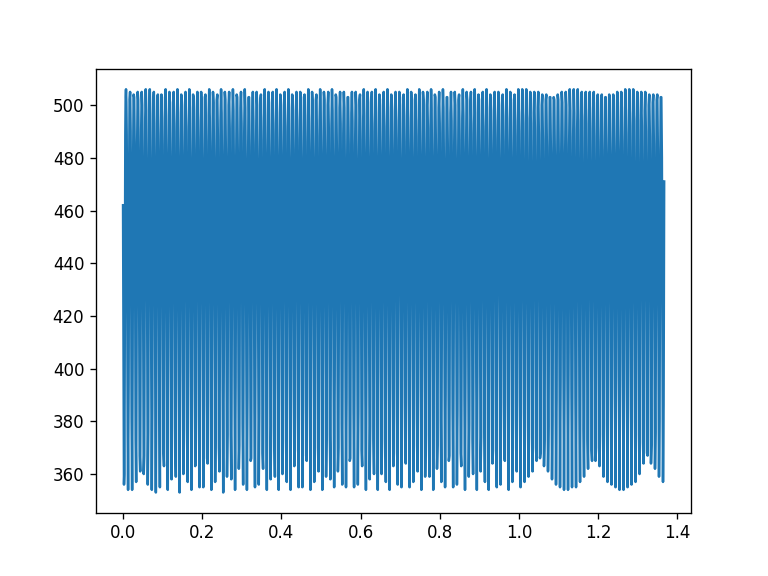

In [12]:
plt.figure("test")
plt.plot(t,y)
plt.show()

<p>Le programme suivant permet de mettre en mémoire dans une liste temps2 un grand nombre de résultats pour cette expérience, stockés sous forme d'un fichier csv<p>

<b>4°)</b> Ecrire ci-dessous un programme <b style="color:red;">en python</b> permettant de construire l'histogramme (avec 20 classes) pour ces mesures.

In [13]:
0.418-0.375
print(6/43e-3)

139.53488372093025


In [14]:
hide_toggle(texte="Correction")

<b>5°)</b> Ouvrez le programme <a href="./US2.ino" target="_blank">US2.ino</a> fourni et <b>téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.<p>Qu'apporte ce programme par rapport à US.ino ?</p>

<p><b>6°)</b> Mesurez le temps d'aller-retour des US entre le capteur et l'écran. Calculez <b style="color:red">sur python</b> la vitesse des US d'après cette expérience.</p>

In [15]:
hide_toggle(texte="Correction")

L'écart type se calcule par la formule:
$\sigma_{n-1}\ =\ \sqrt{\frac{\sum \limits_{1}^{n}{\big( x_i\ -\ \bar{x} \big)^2}}{n\ -\ 1}}$
<p>où $\bar x$ est la valeur moyenne sur la série de n mesures et $x_i$ la i<sup>ème</sup> valeur, obtenue.</p>
<p>Les bornes de l'intervalle de confiance à 95% sont données par $\bar{x}\ \pm\ \frac{k_{95\%}\ \sigma_{n-1}}{\sqrt{n}}$ où $k_{95\%}\ =\ 1{,}645$ vu le nombre de mesures réalisées.</p>
<p><b>7°)</b> Calculez <b style="color:red">sur python</b> puis afficher un encadrement de la vitesse des ultrasons dans l'air d'après cette expérience.</p>

In [16]:
hide_toggle(texte="Correction")

<h2>Partie 2 - Mesure de distance</h2>
<p><b>8°)</b> Ouvrez le programme <a href="./US3.ino" target="_blank">US3.ino</a> fourni. Modifiez le pour qu'il permette de réaliser des mesures de distance. <b>Téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>.

<b>9°)</b> Modifier encore ce programme pour qu'il affiche une valeur après avoir réalisé une moyenne sur 16 mesures. <b>Téléversez le dans votre carte Arduino</b> (attention de bien régler <b style="color:red;">le type de carte, le port et le processeur)</b>. Pour chaque mesure, comparez la valeur donnée par le capteur et celui mesuré avec un mètre ruban.